In [2]:
import json
import requests
import pandas as pd

In [9]:
# http://api.worldbank.org/v2/country/br?format=json    

url = "http://api.worldbank.org/v2/"
method = "/country" 

params = {
            "format" : "json", 
         }

# request the url and store the response in a variable
response = requests.get(url+method,params=params)

response.status_code #200 = success

200

In [10]:
response.url

'http://api.worldbank.org/v2//country?format=json'

In [11]:
# metadata for the repsonse
# first dictionary for the first element for the list

response.json()[0]

{'page': 1, 'pages': 7, 'per_page': '50', 'total': 304}

In [14]:
# first dictionary of the second element of the list. 

print(f"data retrived for the first element :{response.json()[1][1]}")

data retrived for the first element :{'id': 'AFG', 'iso2Code': 'AF', 'name': 'Afghanistan', 'region': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'adminregion': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'incomeLevel': {'id': 'LIC', 'iso2code': 'XM', 'value': 'Low income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Kabul', 'longitude': '69.1761', 'latitude': '34.5228'}


In [17]:
# seperate info we're intrested in

print(response.json()[1][1]['iso2Code'])
print(response.json()[1][1]['name'])
print(response.json()[1][1]['region']['value'])
print(response.json()[1][1]['incomeLevel']['value'])

AF
Afghanistan
South Asia
Low income


In [ ]:
# put some intresting info in a pandas df

# store list of dictionaries with info on all countries
countries = response.json()[1]

# list to store the above dictionary
list_country = []

for country in countries:
    mydict = {}    # empty dict to store value
    mydict['iso2Code'] = country['iso2Code']
    mydict['name'] = country['name']
    mydict['region'] = country['region']['value']
    mydict['incomeLevel'] = country['incomeLevel']['value']
    list_country.append(mydict)   # append value to list
    


In [20]:
# convert the list of dictionaries to a pandas dataframe

df = pd.DataFrame(list_country)
display(df.shape)
display(df.head())

#only got 50 results i.e. only ressults fromt the first page

(50, 4)

,incomeLevel,iso2Code,name,region
0,High income,AW,Aruba,Latin America & Caribbean
1,Low income,AF,Afghanistan,South Asia
2,Aggregates,A9,Africa,Aggregates
3,Lower middle income,AO,Angola,Sub-Saharan Africa
4,Upper middle income,AL,Albania,Europe & Central Asia


In [23]:
# create a while loop to get to all the 7 pages and 304 countries

# https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures

all_countries = []

for page in range(1,8):
    
    params = {
            "format" : "json",
            'page' : page,
         }
    
    response = requests.get(url+method,params=params)
    
    countries = response.json()[1]

    for country in countries:
        mydict = {}    # empty dict to store value
        mydict['iso2Code'] = country['iso2Code']
        mydict['name'] = country['name']
        mydict['region'] = country['region']['value']
        mydict['incomeLevel'] = country['incomeLevel']['value']
        all_countries.append(mydict)   # append value to list
    

In [24]:
df2 = pd.DataFrame(all_countries)
display(df2.shape)
display(df2.head())

# got all 304 countries

(304, 4)

,incomeLevel,iso2Code,name,region
0,High income,AW,Aruba,Latin America & Caribbean
1,Low income,AF,Afghanistan,South Asia
2,Aggregates,A9,Africa,Aggregates
3,Lower middle income,AO,Angola,Sub-Saharan Africa
4,Upper middle income,AL,Albania,Europe & Central Asia


Examine data

In [28]:
df2.describe()

,incomeLevel,iso2Code,name,region
count,304,304,304,304
unique,5,304,304,8
top,Aggregates,DM,IBRD countries classified as high income,Aggregates
freq,86,1,1,86


In [32]:
df2.incomeLevel.unique()


array(['High income', 'Low income', 'Aggregates', 'Lower middle income',
       'Upper middle income'], dtype=object)

In [33]:
df2.region.unique()

array(['Latin America & Caribbean ', 'South Asia', 'Aggregates',
       'Sub-Saharan Africa ', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'North America'], dtype=object)

In [47]:
# look into aggregates

x=df2.loc[(df2['incomeLevel'] == 'Aggregates')]
x.head()

,incomeLevel,iso2Code,name,region
2,Aggregates,A9,Africa,Aggregates
6,Aggregates,L5,Andean Region,Aggregates
7,Aggregates,1A,Arab World,Aggregates
17,Aggregates,B4,East Asia & Pacific (IBRD-only countries),Aggregates
18,Aggregates,B7,Europe & Central Asia (IBRD-only countries),Aggregates


drop countries that have "aggregrates"

In [42]:
a=df2.loc[(df2['incomeLevel'] == 'Aggregates') & (df2['region'] == 'Aggregates')]
a
a.shape

# 86 values with "Aggregates
# drop these values

(86, 4)

In [53]:
df3 = df2.drop(df2[df2['incomeLevel'] == 'Aggregates'].index)
df3.shape

(218, 4)

In [54]:
df3.describe()

,incomeLevel,iso2Code,name,region
count,218,218,218,218
unique,4,218,218,7
top,High income,DM,Liberia,Europe & Central Asia
freq,80,1,1,58


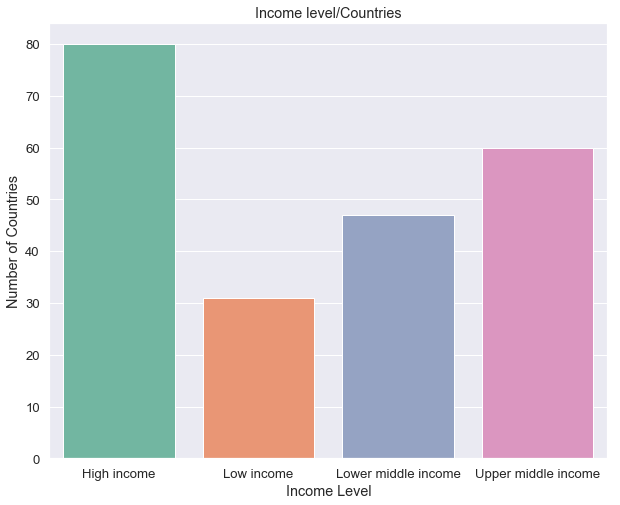

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,8))
sns.set(style="darkgrid", palette="Set2", font_scale=1.2)
sns.countplot(x="incomeLevel", data=df3)
plt.ylabel('Number of Countries')
plt.xlabel('Income Level')
plt.title('Income level/Countries')

plt.show()

Relationship between Income Level and Region

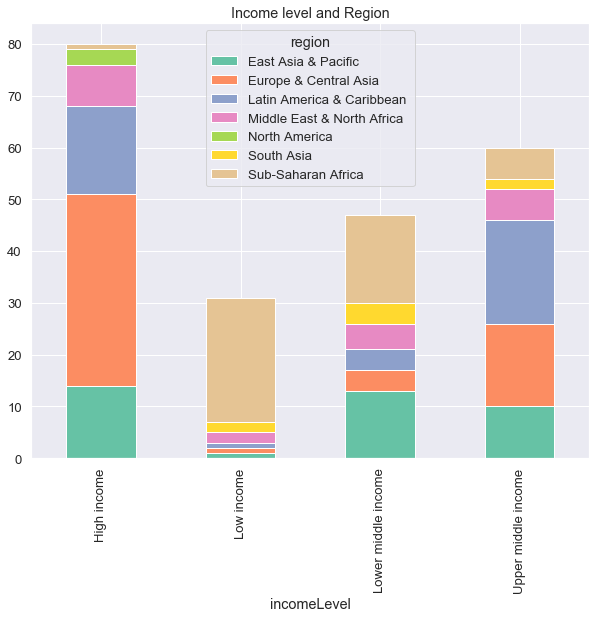

In [97]:

pd.crosstab(df3['incomeLevel'], df3['region']).plot(kind='bar', stacked=True, figsize=(10,8))
plt.title('Income level and Region')
plt.show()